In [1]:
import torch
from utils import show_images_rgb, show_outputs_rgb
from models import *
from dataset import MNISTsuperimposed
from torchvision import transforms
from torch.utils.data import DataLoader
from utils import Downsample, Noise, show_outputs

In [2]:
UpTransformer = UpsamplingTransformer(
    d_model=288,
    encoder_feedforward=1024,
    decoder_feedforward=1024,
    encoder_heads=288,
    decoder_heads=288,
    num_decoder_layers=1,
    num_encoder_layers=1,
    upscale=1
)

TRANSFORMER_PATH = './checkpoints/UpsampleDisambDenoiseCheckpoint99.pt'

RNN_PATH = './checkpoints/RNNFinal.pt'

UpTransformer.load_state_dict(torch.load(TRANSFORMER_PATH))


UpRNN = RNN()
UpRNN.load_state_dict(torch.load(RNN_PATH))


# Now let's check the RNN
print('Parameters for RNN:', sum([parameter.numel() for parameter in UpRNN.parameters()]))
print('Parameters for Transformer:', sum([parameter.numel() for parameter in UpTransformer.parameters()]))


Parameters for RNN: 2846224
Parameters for Transformer: 2301865


In [3]:
transform = transforms.Compose(
    [transforms.Grayscale(),
     transforms.ToTensor(),
     Downsample(),
     Noise(mean=0, dev=0.01)
     ])
target_transform= transforms.Compose(
    [transforms.Grayscale(),
     transforms.ToTensor()
     ])
test_supserimposed = MNISTsuperimposed("./MNIST data/train", train = False, download = True, transform = transform, target_transform=target_transform)

In [4]:
testset = DataLoader(test_supserimposed, batch_size=64, shuffle=True)
inputs,targets = next(iter(testset))
TransformerOutputs = UpTransformer(inputs)

RNNOutputs = UpRNN(inputs, flag = False)
RNNOutputs = torch.cat([RNNOutputs[1].reshape(-1,1,28,28), RNNOutputs[2].reshape(-1,1,28,28)], axis = 1)


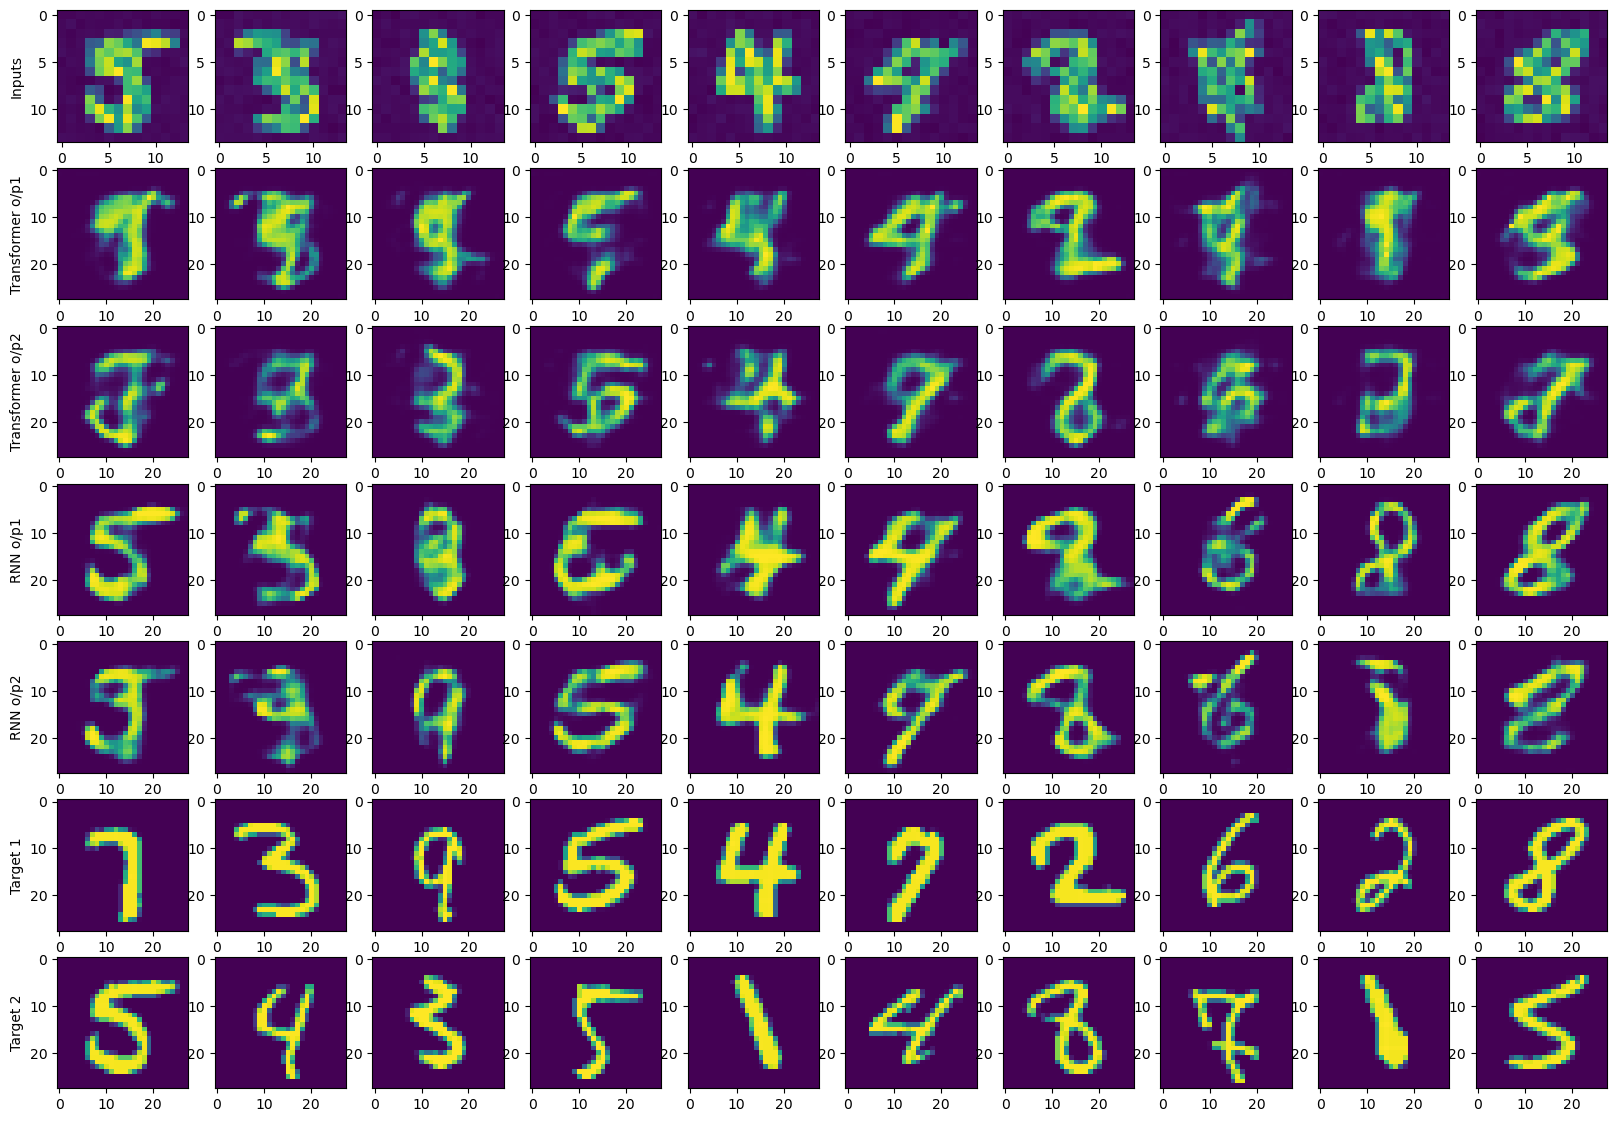

In [5]:
show_outputs_rgb(TransformerOutputs=TransformerOutputs, RNNOutputs= RNNOutputs, targets=targets,inputs= inputs, num_images=10, gray=True)

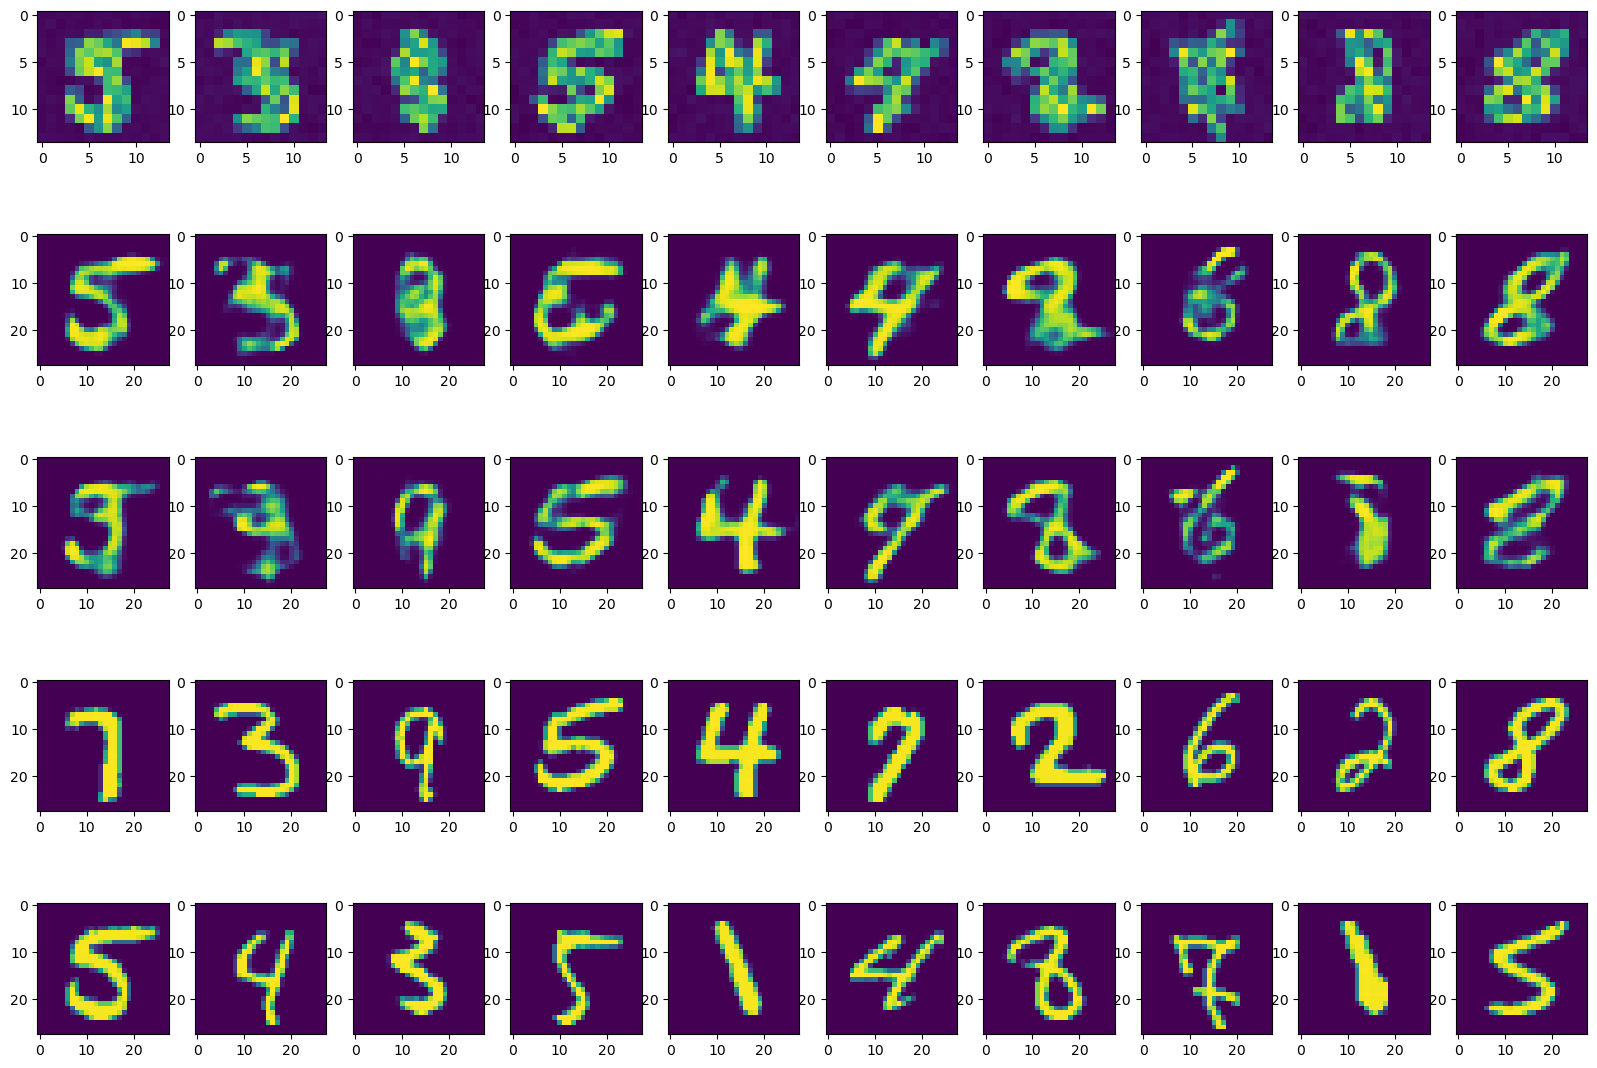

In [6]:
show_outputs(outputs=RNNOutputs, inputs=inputs, targets=targets, num_images=10)